# Домашнее задание по кластеризации

Набор данных содержит сведения о 9000 клиентов банка.

Колонки в датасете:
- CUSTID : Identification of Credit Card holder (Categorical)
- BALANCE : Balance amount left in their account to make purchases (
- BALANCEFREQUENCY : How frequently the Balance is updated, score between 0 and 1 (1 = frequently updated, 0 = not frequently updated)
- PURCHASES : Amount of purchases made from account
- ONEOFFPURCHASES : Maximum purchase amount done in one-go
- INSTALLMENTSPURCHASES : Amount of purchase done in installment
- CASHADVANCE : Cash in advance given by the user
- PURCHASESFREQUENCY : How frequently the Purchases are being made, score between 0 and 1 (1 = frequently purchased, 0 = not frequently purchased)
- ONEOFFPURCHASESFREQUENCY : How frequently Purchases are happening in one-go (1 = frequently purchased, 0 = not frequently purchased)
- PURCHASESINSTALLMENTSFREQUENCY : How frequently purchases in installments are being done (1 = frequently done, 0 = not frequently done)
- CASHADVANCEFREQUENCY : How frequently the cash in advance being paid
- CASHADVANCETRX : Number of Transactions made with "Cash in Advanced"
- PURCHASESTRX : Numbe of purchase transactions made
- CREDITLIMIT : Limit of Credit Card for user
- PAYMENTS : Amount of Payment done by user
- MINIMUM_PAYMENTS : Minimum amount of payments made by user
- PRCFULLPAYMENT : Percent of full payment paid by user
- TENURE : Tenure of credit card service for user

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


## Задания

### Задание 1.

Провести исследование данных (в том числе с визуализацией, к исследованию должны быть даны выводы и комментарии, все графики и оси должны быть подписаны).

<Figure size 720x432 with 0 Axes>

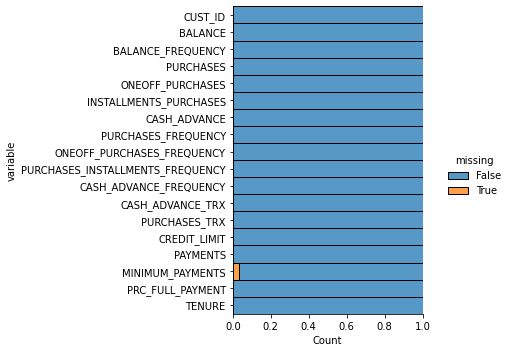

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,6))
sns.displot(
    data=df.isna().melt(value_name="missing"),
    y="variable",
    hue="missing",
    multiple="fill",
    aspect=1.25
)


In [3]:
df = pd.read_csv('https://raw.githubusercontent.com/Adelaaas/Data_science_basic_22-23_1/main/home_work_7-8_clustering/Credit%20Card%20Dataset.csv', sep=',')
df

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,C19186,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,6
8946,C19187,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,NaN,0.000000,6
8947,C19188,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,6
8948,C19189,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.250000,6


In [5]:
# Исследование размерности данных

print(f'Размерность данных:\n{df.shape}\n')


Размерность данных:
(8950, 18)



In [6]:
# Исследование на типы данных

print('Типы данных по столбцам:')
coltype = dict()
for i in df.columns:
    coltype[i] = type(df.loc[0,i])
    print(f'{i} : {coltype[i]}')

# print(f'Типы данных по столбцам:\n{coltype}\n')


Типы данных по столбцам:
CUST_ID : <class 'str'>
BALANCE : <class 'numpy.float64'>
BALANCE_FREQUENCY : <class 'numpy.float64'>
PURCHASES : <class 'numpy.float64'>
ONEOFF_PURCHASES : <class 'numpy.float64'>
INSTALLMENTS_PURCHASES : <class 'numpy.float64'>
CASH_ADVANCE : <class 'numpy.float64'>
PURCHASES_FREQUENCY : <class 'numpy.float64'>
ONEOFF_PURCHASES_FREQUENCY : <class 'numpy.float64'>
PURCHASES_INSTALLMENTS_FREQUENCY : <class 'numpy.float64'>
CASH_ADVANCE_FREQUENCY : <class 'numpy.float64'>
CASH_ADVANCE_TRX : <class 'numpy.int64'>
PURCHASES_TRX : <class 'numpy.int64'>
CREDIT_LIMIT : <class 'numpy.float64'>
PAYMENTS : <class 'numpy.float64'>
MINIMUM_PAYMENTS : <class 'numpy.float64'>
PRC_FULL_PAYMENT : <class 'numpy.float64'>
TENURE : <class 'numpy.int64'>


Исследование на пропуски:
CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64



Text(0.5, 1.0, 'Количество пустых значений в данных')

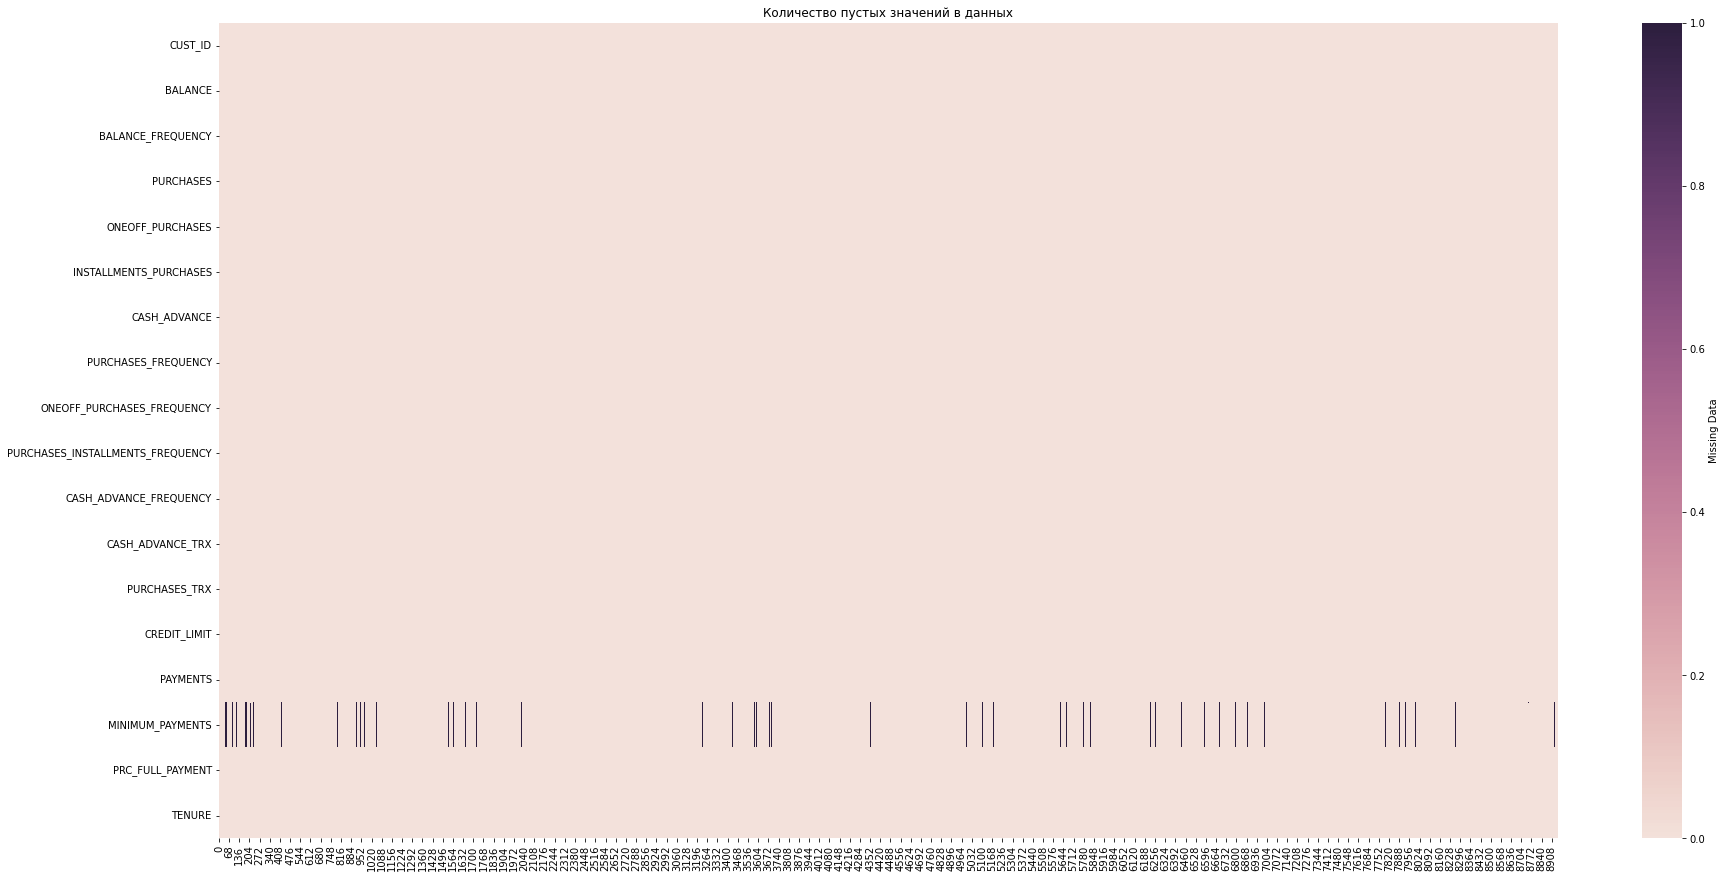

In [7]:
# Исследование на пропуски в данных

print(f'Исследование на пропуски:\n{df.isna().sum()}\n')

plt.figure(figsize=(30,15))
cmap = sns.cubehelix_palette(as_cmap=True, light=.9)
sns.heatmap(df.isna().transpose(), cmap=cmap,
            cbar_kws={'label': 'Missing Data'})

plt.title('Количество пустых значений в данных')


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seab

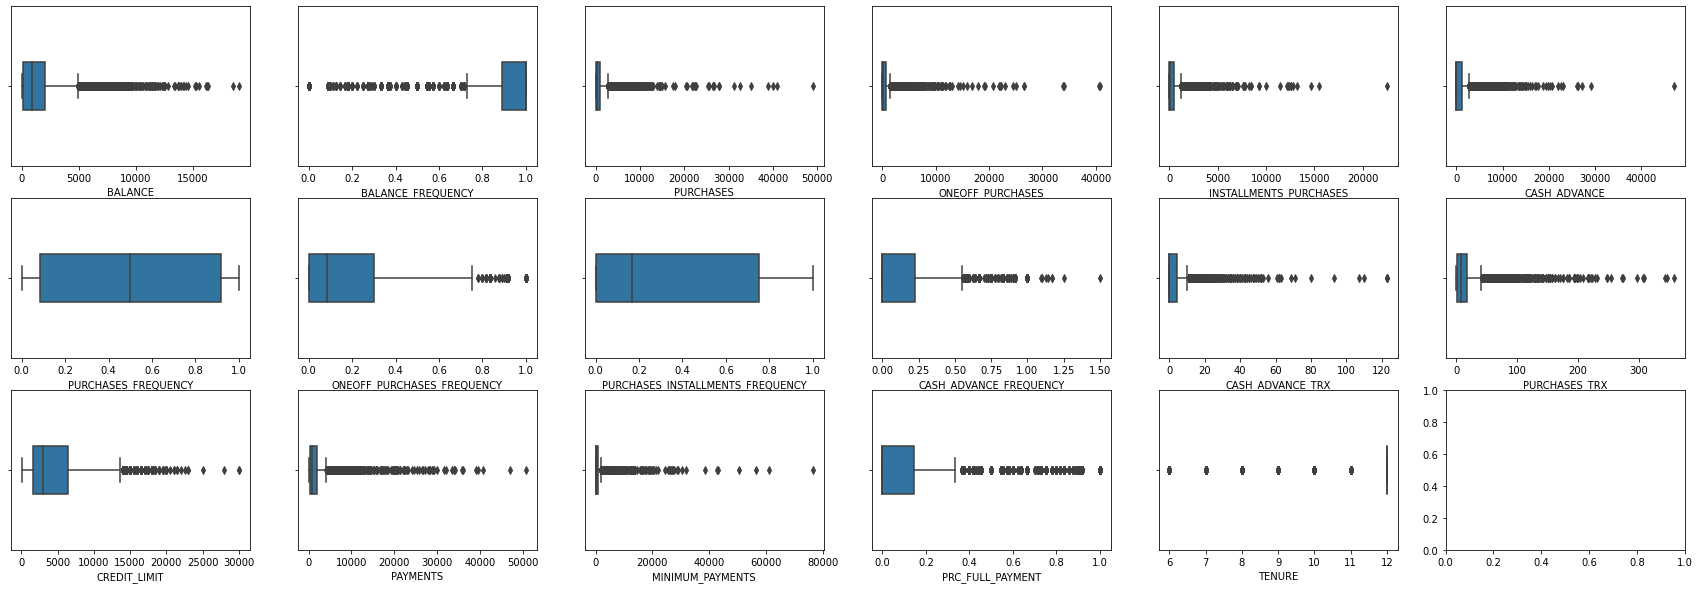

In [106]:
# Исследование на аномальные значения, выбросы

figure, axes = plt.subplots(3,6,figsize=(30,10))

for i in range(17):
  sns.boxplot(df[df.columns[i+1]], ax=axes[i//6][i%6], width=0.3)


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


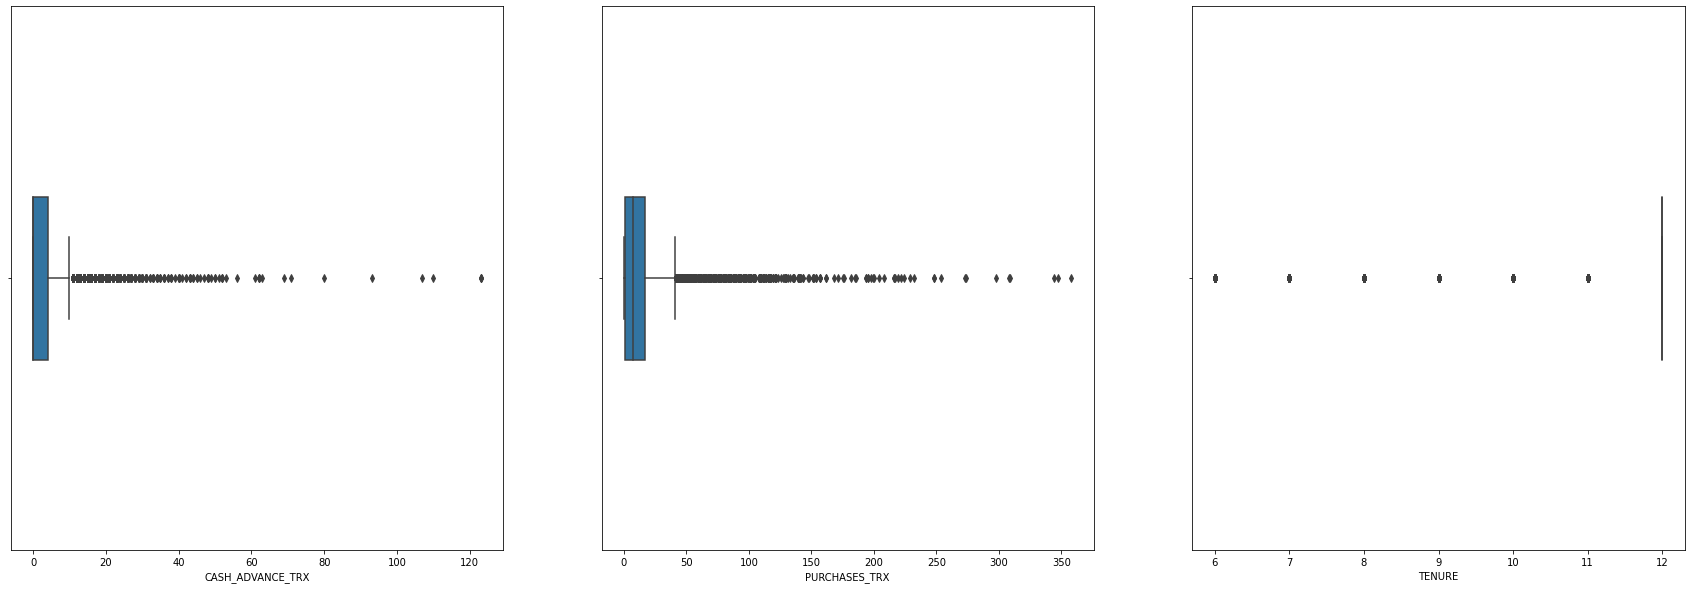

In [101]:
# Исследование на картегориальные значения

figure, axes = plt.subplots(1,3,figsize=(30,10))
cl = ['CASH_ADVANCE_TRX','PURCHASES_TRX','TENURE']
for i in range(3):
  sns.boxplot(df[cl[i]], ax=axes[i], width=0.3)


In [10]:
# Ислледование на дубликаты

print('Количество уникальных значений по столбцам:')
dupl = dict()
for i in df.columns:
    dupl[i] = len(np.unique(df.loc[:,i]))
    print(f'{i} : {dupl[i]}')

# print(f'Количество уникальных значений по столбцам:\n{dupl}')


Количество уникальных значений по столбцам:
CUST_ID : 8950
BALANCE : 8871
BALANCE_FREQUENCY : 43
PURCHASES : 6203
ONEOFF_PURCHASES : 4014
INSTALLMENTS_PURCHASES : 4452
CASH_ADVANCE : 4323
PURCHASES_FREQUENCY : 47
ONEOFF_PURCHASES_FREQUENCY : 47
PURCHASES_INSTALLMENTS_FREQUENCY : 47
CASH_ADVANCE_FREQUENCY : 54
CASH_ADVANCE_TRX : 65
PURCHASES_TRX : 173
CREDIT_LIMIT : 206
PAYMENTS : 8711
MINIMUM_PAYMENTS : 8637
PRC_FULL_PAYMENT : 47
TENURE : 7


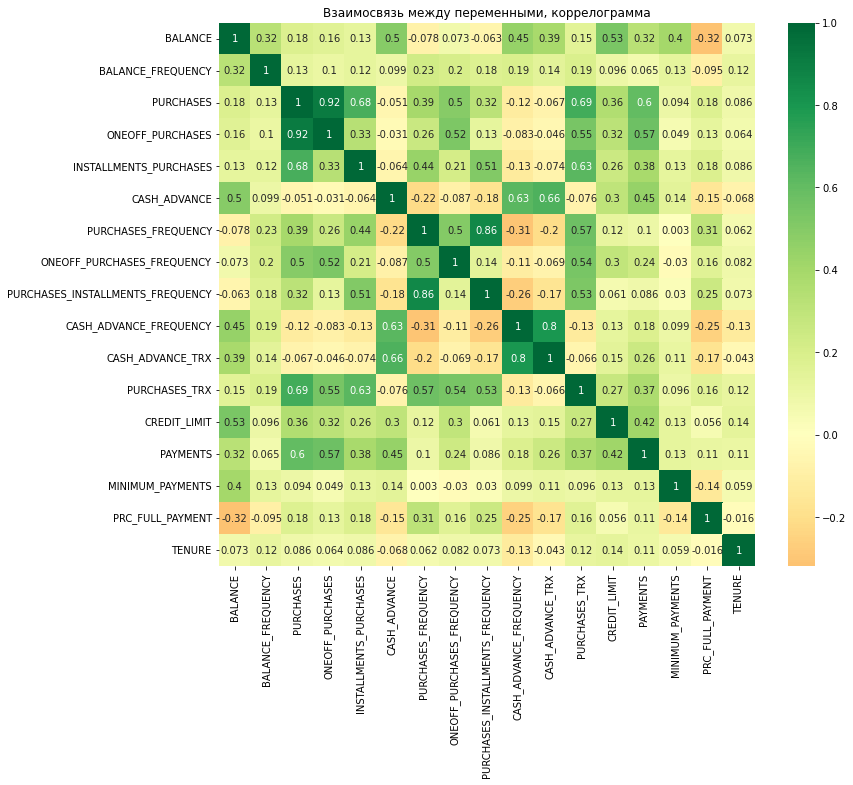

In [11]:
# Исследование взаимосвязи между переменными

plt.figure(figsize=(12,10))
sns.heatmap(df.corr(), xticklabels=df.corr().columns, yticklabels=df.corr().columns, cmap='RdYlGn', center=0, annot=True)

plt.title('Взаимосвязь между переменными, коррелограмма')
plt.show()


### Задание 2

Реализовать метод кластарезации KMeans:
1. Методом локтя и силуется (в том числе с использованием графиков) оценить оптимальное число кластеров и обосновать его.
2. Построить точечный график объектов до кластеризации и после с цветовым разделением на кластеры. Для построения графиков придется взять только две переменные как признаки, но строить кластеризацию не обязательно на двух переменных. 

P.s. все графики должны быть подписанны и к ним должны прилагаться выводы.

In [12]:
from sklearn.cluster import KMeans


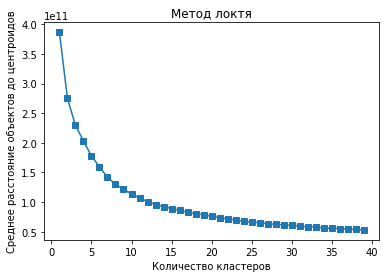

In [13]:
SSE = []
df2 = df.drop(columns=['CUST_ID'])
df2 = df2.dropna(axis=0, how='any')
for i in range(1,40):
  kmeans = KMeans(n_clusters = i)
  kmeans.fit(df2)
  SSE.append(kmeans.inertia_)

plt.plot(range(1,40), SSE, marker='s');
plt.title('Метод локтя')
plt.xlabel('Количество кластеров')
plt.ylabel('Среднее расстояние объектов до центроидов')
plt.show()


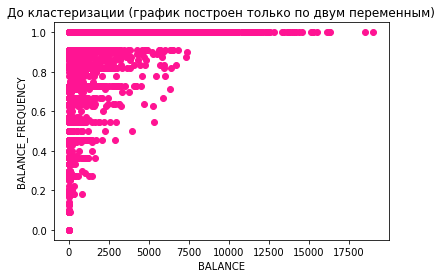

In [14]:
x = list( df2['BALANCE'] )
y = list( df2['BALANCE_FREQUENCY'] )

fig, ax = plt.subplots()

ax.scatter(x, y, c = 'deeppink')
plt.title('До кластеризации (график построен только по двум переменным)')
plt.xlabel('BALANCE')
plt.ylabel('BALANCE_FREQUENCY')

plt.show()



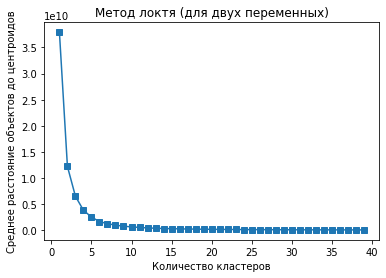

In [15]:
SSE = []
df3 = df2[['BALANCE', 'BALANCE_FREQUENCY']]

for i in range(1,40):
  kmeans = KMeans(n_clusters = i)
  kmeans.fit(df3)
  SSE.append(kmeans.inertia_)

plt.plot(range(1,40), SSE, marker='s');
plt.title('Метод локтя (для двух переменных)')
plt.xlabel('Количество кластеров')
plt.ylabel('Среднее расстояние объектов до центроидов')
plt.show()



<ipython-input-16-b57dec615e73>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['cluster'] = Y_pred


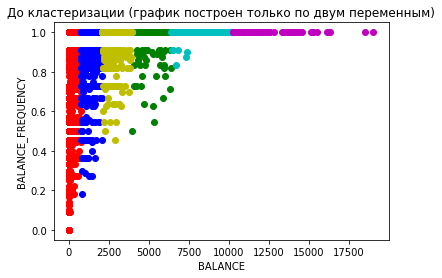

In [16]:
n_clust_df3 = 6
kmeans = KMeans(n_clusters=n_clust_df3)
kmeans.fit(df3)
Y_pred = kmeans.labels_

df3['cluster'] = Y_pred
c = ['r','g','b','c','m','y','k']

fig, ax = plt.subplots()

for i in range(n_clust_df3):
    ax.scatter(df3[df3['cluster'] == i]['BALANCE'], df3[df3['cluster']==i]['BALANCE_FREQUENCY'], c = c[i])

plt.title('До кластеризации (график построен только по двум переменным)')
plt.xlabel('BALANCE')
plt.ylabel('BALANCE_FREQUENCY')

plt.show()


### Задание 3

Реализовать иерархический метод кластарезации:
1. Должны быть построены дендрограммы и обоснован выбор количества кластеров.
2. Построить точечный график объектов до кластеризации и после с цветовым разделением на кластеры. Для построения графиков придется взять только две переменные как признаки, но строить кластеризацию не обязательно на двух переменных.

P.s. все графики должны быть подписанны и к ним должны прилагаться выводы.

In [20]:
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster


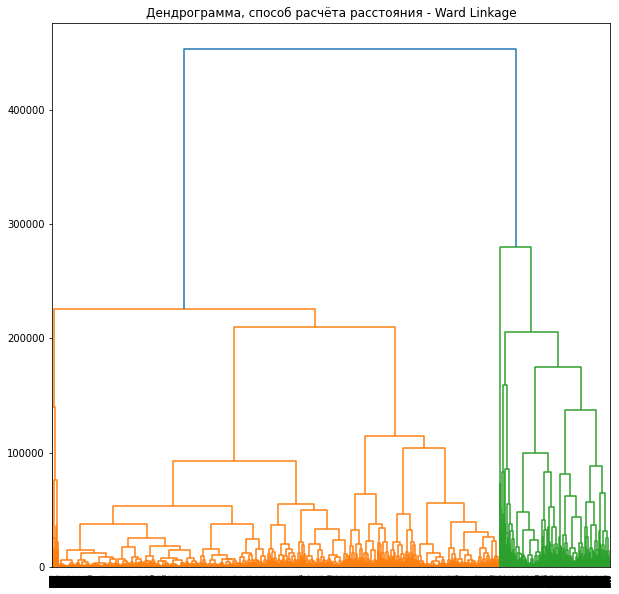

In [61]:
fig = plt.figure(figsize=(10, 10))

Z = linkage(df2, 'ward')
dn = dendrogram(Z)

plt.title('Дендрограмма, способ расчёта расстояния - Ward Linkage')
plt.show()


In [67]:
Z = linkage(df2, method='average', metric='euclidean')
label = fcluster(Z, 20000, criterion='distance')
df2['cluster'] = label

print(f'Количество кластеров: {len(np.unique(label))}')
print('Разделение на кластеры всех переменных:')
df2



Количество кластеров: 21
Разделение на кластеры всех переменных:


,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,cluster
0,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12,7
1,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,7
2,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12,7
4,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12,7
5,1809.828751,1.000000,1333.28,0.00,1333.28,0.000000,0.666667,0.000000,0.583333,0.000000,0,8,1800.0,1400.057770,2407.246035,0.000000,12,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8943,5.871712,0.500000,20.90,20.90,0.00,0.000000,0.166667,0.166667,0.000000,0.000000,0,1,500.0,58.644883,43.473717,0.000000,6,7
8945,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,6,7
8947,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,6,7
8948,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.250000,6,7


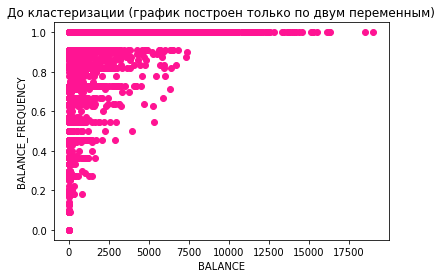

In [63]:
x = list( df2['BALANCE'] )
y = list( df2['BALANCE_FREQUENCY'] )

fig, ax = plt.subplots()

ax.scatter(x, y, c = 'deeppink')
plt.title('До кластеризации (график построен только по двум переменным)')
plt.xlabel('BALANCE')
plt.ylabel('BALANCE_FREQUENCY')

plt.show()


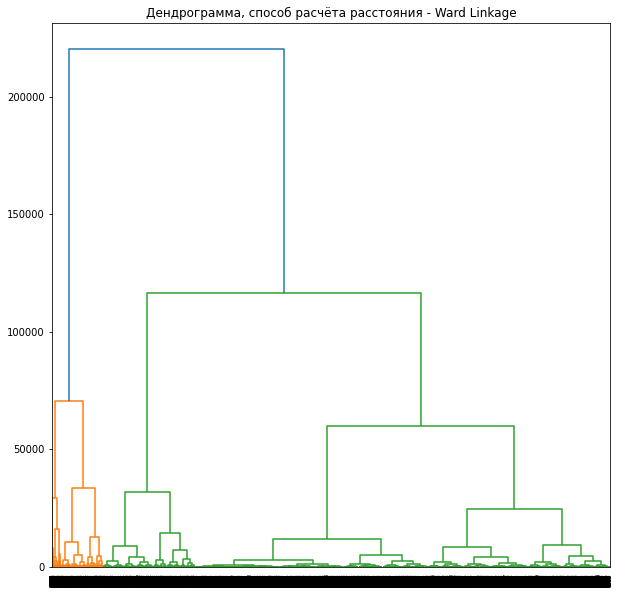

In [65]:
if ('cluster' in df.columns):
    df3 = df3.drop(columns = ['cluster'])

fig = plt.figure(figsize=(10, 10))

Z3 = linkage(df3, 'ward')
dn = dendrogram(Z)

plt.title('Дендрограмма, способ расчёта расстояния - Ward Linkage')
plt.show()


In [79]:
Z3 = linkage(df3, 'ward')
label3 = fcluster(Z3, 50000, criterion='distance')
df3['cluster'] = label3

print(f'Количество кластеров: {len(np.unique(label3))}')
print('Разделение на кластеры всех переменных:')
df3


Количество кластеров: 5
Разделение на кластеры всех переменных:


,BALANCE,BALANCE_FREQUENCY,cluster
0,40.900749,0.818182,4
1,3202.467416,0.909091,3
2,2495.148862,1.000000,3
4,817.714335,1.000000,5
5,1809.828751,1.000000,5
...,...,...,...
8943,5.871712,0.500000,4
8945,28.493517,1.000000,4
8947,23.398673,0.833333,4
8948,13.457564,0.833333,4


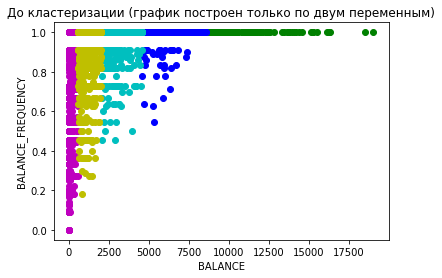

In [80]:
c = ['r','g','b','c','m','y','k']

fig, ax = plt.subplots()

for i in range(n_clust_df3):
    ax.scatter(df3[df3['cluster'] == i]['BALANCE'], df3[df3['cluster']==i]['BALANCE_FREQUENCY'], c = c[i])

plt.title('До кластеризации (график построен только по двум переменным)')
plt.xlabel('BALANCE')
plt.ylabel('BALANCE_FREQUENCY')

plt.show()
